In [181]:
from wfield import *
import os 
import h5py
import pandas as pd
from scipy.io import loadmat
from scipy.signal import savgol_filter

In [182]:
directory = "C:/Behavior/Animals/"
animal = "FV-4/"
maze = "SD/"
session = "12-Jul-2022/"
file = "{}/"
sync = "sync"
path_sync = os.path.join(directory, animal, maze, session, sync)
os.chdir(path_sync)
print(path_sync)

C:/Behavior/Animals/FV-4/SD/12-Jul-2022/sync


In [183]:
df = pd.read_csv('All_data.csv')
df

,Unnamed: 0,trial,img session,start frame,end frame,correct
0,0,1,1,-56,236,1
1,1,2,1,335,485,0
2,2,3,1,806,1072,1
3,3,4,1,1172,1365,1
4,4,5,1,1460,1649,1
...,...,...,...,...,...,...
225,25,226,8,7030,7200,1
226,26,227,8,7294,7488,0
227,27,228,8,7809,7967,1
228,28,229,8,8061,8243,1


In [184]:
group_act_load = np.load('group_act.npy', allow_pickle = True)

In [185]:
lmarks = load_allen_landmarks('dorsal_cortex_landmarks.json')
ccf_regions_reference,proj,brain_outline = allen_load_reference('dorsal_cortex')
# the reference is in allen CCF space and needs to be converted
# this converts to warped image space (accounting for the transformation)
ccf_regions = allen_transform_regions(None,ccf_regions_reference,
                                      resolution = lmarks['resolution'],
                                        bregma_offset = lmarks['bregma_offset'])
atlas, areanames, brain_mask = atlas_from_landmarks_file('dorsal_cortex_landmarks.json') # this loads the atlas in transformed coords

# this converts the reference to image space (unwarped)
atlas_im, areanames, brain_mask = atlas_from_landmarks_file('dorsal_cortex_landmarks.json',do_transform = True) # this loads the untransformed atlas
ccf_regions_im = allen_transform_regions(lmarks['transform'],ccf_regions_reference,
                                        resolution = lmarks['resolution'],
                                        bregma_offset = lmarks['bregma_offset'])

In [186]:
trial = 33

In [193]:
trial_act = group_act_load[trial][:]
corr_iti = len(trial_act)-90
incorr_iti = len(trial_act)-150

In [194]:
trial_activity = group_act_load[trial]

In [195]:
def fig_trial(trial_activity):
    #Figure for multi ROI activity during a trial 
    #area = [2,3,8,10,20,32]
    area = [2,3,20,31]

    fig, axs = plt.subplots(1, 1, figsize = (4,3))
    fig.set_dpi(200.0)
    for i in area:
        trial_act = trial_activity[i]
        axs.plot(trial_act, label = ccf_regions_im['acronym'][i])
        axs.set_xticks(ticks=[i * 30 for i in list(range(int(len(trial_act)/30+2)))]) #ticks every 30th frame for axis 
        axs.hlines(y=0, xmin=0, xmax=len(trial_act), colors='black', linestyles='--', lw=1)
        axs.vlines(x=0, ymin=-5, ymax=6, colors='black', linestyles='--', lw=1)
        if df['correct'][trial] == 1:
            axs.vlines(x=corr_iti, ymin=-5, ymax=6, colors='black', linestyles='--', lw=1)
        elif df['correct'][trial] == 0:
            axs.vlines(x=incorr_iti, ymin=-5, ymax=6, colors='black', linestyles='--', lw=1)
        axs.vlines(x=len(trial_act), ymin=-5, ymax=6, colors='black', linestyles='--', lw=1)
        axs.legend()
        axs.legend(bbox_to_anchor=(1.0, 1), loc='upper left', borderaxespad=0,  prop={'size': 6})
        axs.locator_params(axis='x', nbins=6)
        axs.set_xlabel('frames')
        axs.set_ylabel('z-scored deltaF/F')
        axs.set_ylim([-5,5]);

    fig.tight_layout()

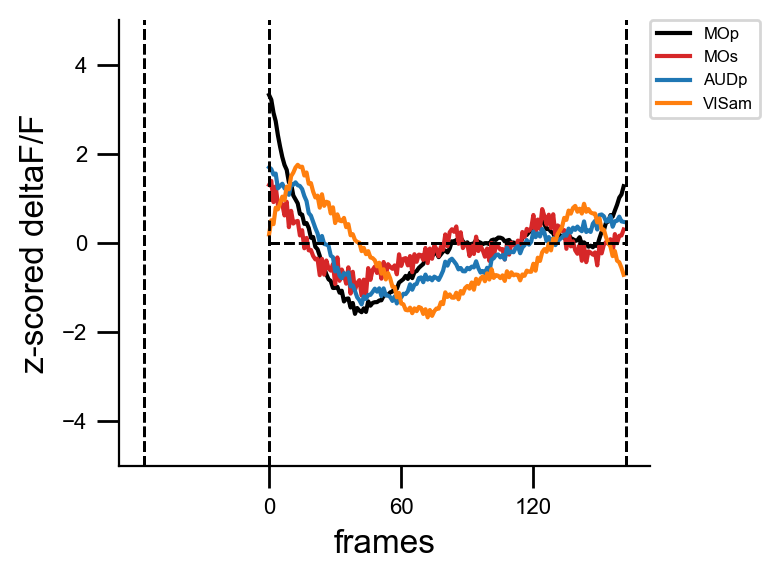

In [196]:
fig_trial(group_act_load[trial])

In [191]:
#Figure with subfigures for each ROI for the specified trial 
def ROI_for_trial(trial_activity):
    fig = plt.figure(figsize = [12,12])
    for i in range(33):
        if i > 0:
            fig.add_subplot(6,6,i+1)
            trial_act = trial_activity[i]
            plt.hlines(y=0, xmin=0, xmax=len(trial_act), colors='purple', linestyles='--', lw=2)
            plt.plot(trial_act)
            plt.title(ccf_regions_im['acronym'][i]) 
            plt.axis('off')
            plt.locator_params(axis='y', nbins=2) 
            plt.locator_params(axis='x', nbins=2)
            plt.ylim([-5, 5]);
            fig.tight_layout()
        elif i == 0:
            fig.add_subplot(6,6,i+1)
            trial_act = group_act_load[trial][i]
            plt.xticks(ticks=[i * 30 for i in list(range(int(len(trial_act)/30+2)))]) #ticks every 30th frame for axis 
            plt.plot(trial_act)
            plt.hlines(y=0, xmin=0, xmax=len(trial_act), colors='purple', linestyles='--', lw=2)
            plt.title(ccf_regions_im['acronym'][i]) 
            plt.axis('on')
            plt.ylim([-5, 5]);
            plt.locator_params(axis='y', nbins=2) 
            plt.locator_params(axis='x', nbins=6)
            plt.xlabel('frames')
            plt.ylabel('z-scored deltaF/F')
            fig.tight_layout()

    #fig.savefig(os.path.join(path, 'deltaF_R.jpeg'), dpi=1000)

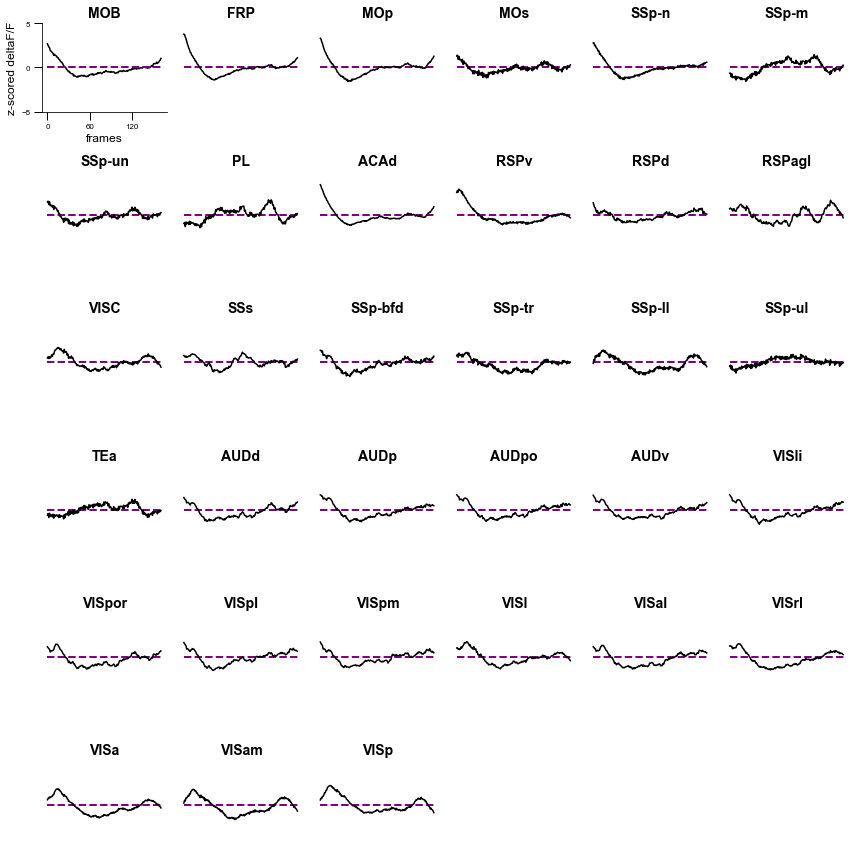

In [192]:
ROI_for_trial(group_act_load[trial])